# Auxillary Lookup Tables

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./

In [2]:
/bin/rm -rf 214
download_chandra_obsid 214 evt2,cntr_img


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       28 Mb  ####################          < 1 s  38082.9 kb/s
  cntr_img jpg       731 Kb  ####################          < 1 s  24847.6 kb/s
  cntr_img fits      316 Kb  ####################          < 1 s  11787.6 kb/s

      Total download size for ObsId 214 = 29 Mb
      Total download time for ObsId 214 = < 1 s



In [3]:
plist ximage_lut


Parameters for /export/ciao-4.13/contrib/param/ximage_lut.par

#
# Color Lookup Tables extracted from NASA XImage package
#
#    http://heasarc.gsfc.nasa.gov/xanadu/ximage/ximage.html
#
# converted to the ".lut" format used by ds9, chips, and dmimg2jpg
#
#
           (bb = ${ASCDS_CONTRIB}/data/ximage_bb.lut -> /export/ciao-4.13/contrib/data/ximage_bb.lut) Color Lookup Table
        (blue1 = ${ASCDS_CONTRIB}/data/blue1.lut -> /export/ciao-4.13/contrib/data/blue1.lut) Color Lookup Table
        (blue2 = ${ASCDS_CONTRIB}/data/blue2.lut -> /export/ciao-4.13/contrib/data/blue2.lut) Color Lookup Table
        (blue3 = ${ASCDS_CONTRIB}/data/blue3.lut -> /export/ciao-4.13/contrib/data/blue3.lut) Color Lookup Table
        (blue4 = ${ASCDS_CONTRIB}/data/blue4.lut -> /export/ciao-4.13/contrib/data/blue4.lut) Color Lookup Table
    (bluebase1 = ${ASCDS_CONTRIB}/data/bluebase1.lut -> /export/ciao-4.13/contrib/data/bluebase1.lut) Color Lookup Table
    (bluebase2 = ${ASCDS_CONTRIB}/data/bluebase2

In [4]:
plist imagej_lut


Parameters for /export/ciao-4.13/contrib/param/imagej_lut.par

#
#
# Color Lookup Tables extracted from the NIH's ImageJ package
#
#  http://rsbweb.nih.gov/ij/
#  
# converted to the ".lut" format used by ds9, chips, and dmimg2jpg
#
     (000-gray = ${ASCDS_CONTRIB}/data/000-gray.lut -> /export/ciao-4.13/contrib/data/000-gray.lut) Color Lookup Table
     (001-fire = ${ASCDS_CONTRIB}/data/001-fire.lut -> /export/ciao-4.13/contrib/data/001-fire.lut) Color Lookup Table
 (002-spectrum = ${ASCDS_CONTRIB}/data/002-spectrum.lut -> /export/ciao-4.13/contrib/data/002-spectrum.lut) Color Lookup Table
      (003-ice = ${ASCDS_CONTRIB}/data/003-ice.lut -> /export/ciao-4.13/contrib/data/003-ice.lut) Color Lookup Table
    (004-phase = ${ASCDS_CONTRIB}/data/004-phase.lut -> /export/ciao-4.13/contrib/data/004-phase.lut) Color Lookup Table
   (005-random = ${ASCDS_CONTRIB}/data/005-random.lut -> /export/ciao-4.13/contrib/data/005-random.lut) Color Lookup Table
    (16_colors = ${ASCDS_CONTRIB}/data/1

        (vivid = ${ASCDS_CONTRIB}/data/vivid.lut -> /export/ciao-4.13/contrib/data/vivid.lut) Color Lookup Table
       (warhol = ${ASCDS_CONTRIB}/data/warhol.lut -> /export/ciao-4.13/contrib/data/warhol.lut) Color Lookup Table
         (mode = ql)              



## ds9

In [5]:
ds9 -iconify 214/primary/*img2.fits.gz -smooth -cmap load $ASCDS_CONTRIB/data/heart.lut \
  -log -export png ds9.png &
sleep 10
xpaset -p ds9 quit

[1] 19170
[1]+  Done                    ds9 -iconify 214/primary/*img2.fits.gz -smooth -cmap load $ASCDS_CONTRIB/data/heart.lut -log -export png ds9.png


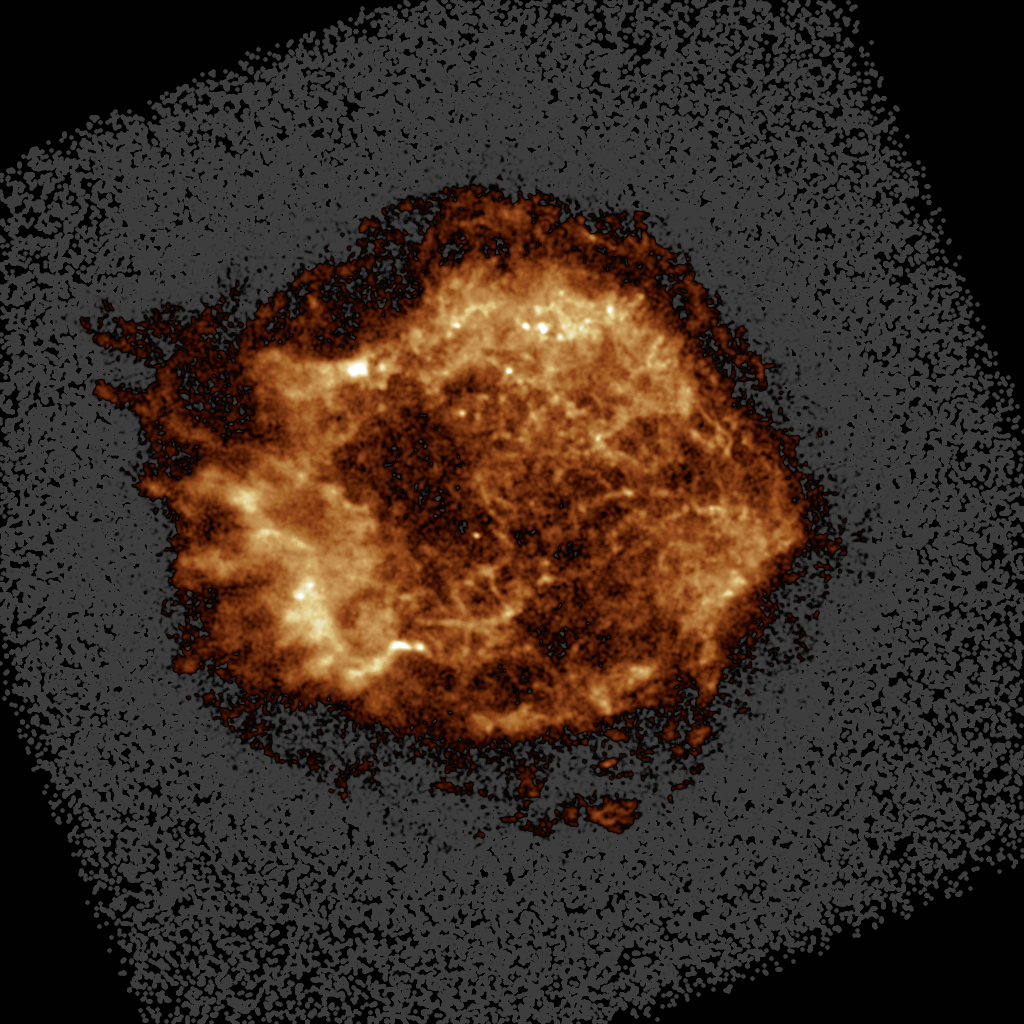

In [6]:
display < ds9.png

## matplotlib

In [7]:
aconvolve 214/primary/*img2.fits.gz - "lib:gaus(2,5,5,3,3)" meth=slide | \
dmimgcalc - none img_sm_asinh.fits op="imgout=asinh(img1)" clob+

In [8]:
cat << EOM > cmds.py
import paramio as pio
from pycrates import read_file
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap

heart_lut = pio.pget("imagej_lut", "heart")
tab = open(heart_lut,"r").readlines()
rgb = [ x.strip().split() for x in tab if not x.startswith("#")]
rgba= [ [float(x[0]),float(x[1]),float(x[2]),1.0] for x in rgb ]
heart_lut_cmap = ListedColormap(rgba)

img = read_file('img_sm_asinh.fits')
imgvals = img.get_image().values
plt.imshow(imgvals, origin='lower', cmap=heart_lut_cmap)
plt.savefig("matplotlib.png")
EOM

python cmds.py

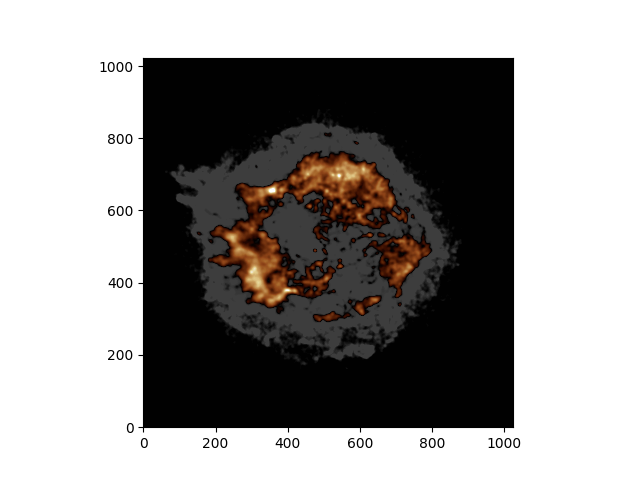

In [9]:
display < matplotlib.png

## dmimg2jpg


In [10]:
punlearn dmimg2jpg
dmimg2jpg infile=img_sm_asinh.fits outfile=dmimg2jpg.jpg \
  lutfile=")imagej_lut.heart"  \
  scalefun=linear mode=h clobber=yes

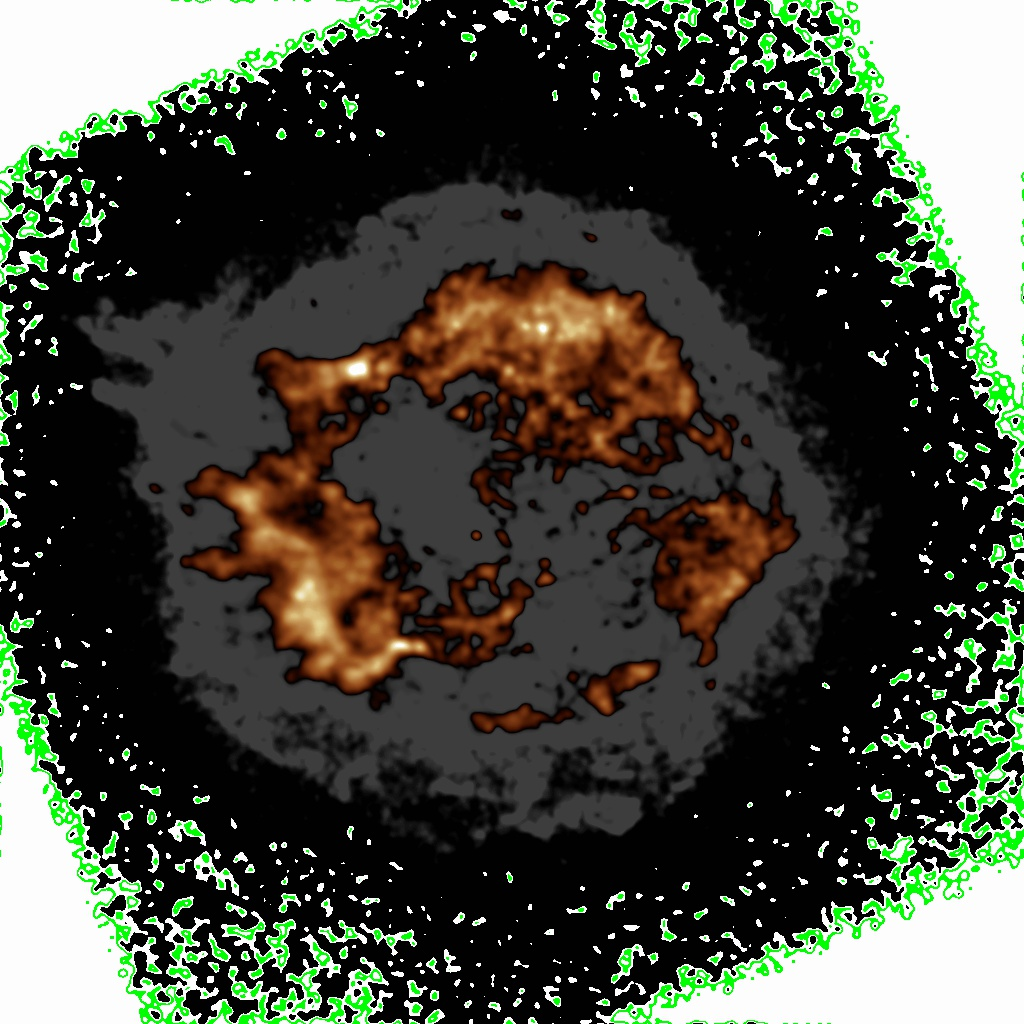

In [11]:
display < dmimg2jpg.jpg

# Cleanup


In [12]:
/bin/rm -rf 214
